# Pandas Basics

A high-level overview of the [Pandas](https://pandas.pydata.org) library. This is not a standalone notebook. Please see the slides or video for a narrative explanation of what is going on.

Alternately, lab 2 provides a narrative explanation of much of the content of this notebook.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

## Reading in DataFrames from Files

Pandas has a number of very useful file reading tools. You can see them enumerated by typing "pd.re" and pressing tab. We'll be using read_csv today. 

In [3]:
elections = pd.read_csv("elections.csv")
elections # if we end a cell with an expression or variable name, the result will print

Year          Candidate                  Party  Popular vote Result  \
0    1824     Andrew Jackson  Democratic-Republican        151271   loss   
1    1824  John Quincy Adams  Democratic-Republican        113142    win   
2    1828     Andrew Jackson             Democratic        642806    win   
3    1828  John Quincy Adams    National Republican        500897   loss   
4    1832     Andrew Jackson             Democratic        702735    win   
..    ...                ...                    ...           ...    ...   
177  2016         Jill Stein                  Green       1457226   loss   
178  2020       Joseph Biden             Democratic      81268924    win   
179  2020       Donald Trump             Republican      74216154   loss   
180  2020       Jo Jorgensen            Libertarian       1865724   loss   
181  2020     Howard Hawkins                  Green        405035   loss   

             %  
0    57.210122  
1    42.789878  
2    56.203927  
3    43.796073  
4    54.574789  
..         ...  
177   1.073699  
178  51.311515  
179  46.858542  
180   1.177979  
181   0.255731  

[182 rows x 6 columns]

As a simple indexing example, consider the code below, which returns the first 5 rows of the DataFrame.

Note that `.loc` is an operator, not a function. We will cover this concept later.

In [4]:
elections.loc[0:4]

Year          Candidate                  Party  Popular vote Result  \
0  1824     Andrew Jackson  Democratic-Republican        151271   loss   
1  1824  John Quincy Adams  Democratic-Republican        113142    win   
2  1828     Andrew Jackson             Democratic        642806    win   
3  1828  John Quincy Adams    National Republican        500897   loss   
4  1832     Andrew Jackson             Democratic        702735    win   

           %  
0  57.210122  
1  42.789878  
2  56.203927  
3  43.796073  
4  54.574789

We can also use the head command to return only a few rows of a dataframe.

In [5]:
elections.head(5)

Year          Candidate                  Party  Popular vote Result  \
0  1824     Andrew Jackson  Democratic-Republican        151271   loss   
1  1824  John Quincy Adams  Democratic-Republican        113142    win   
2  1828     Andrew Jackson             Democratic        642806    win   
3  1828  John Quincy Adams    National Republican        500897   loss   
4  1832     Andrew Jackson             Democratic        702735    win   

           %  
0  57.210122  
1  42.789878  
2  56.203927  
3  43.796073  
4  54.574789

Or the tail command to get the last so many rows.

In [6]:
elections.tail(5)

Year       Candidate        Party  Popular vote Result          %
177  2016      Jill Stein        Green       1457226   loss   1.073699
178  2020    Joseph Biden   Democratic      81268924    win  51.311515
179  2020    Donald Trump   Republican      74216154   loss  46.858542
180  2020    Jo Jorgensen  Libertarian       1865724   loss   1.177979
181  2020  Howard Hawkins        Green        405035   loss   0.255731

If we want a subset of the columns, we can also use loc just to ask for those.

In [7]:
elections.loc[0:4, "Year":"Party"]

Year          Candidate                  Party
0  1824     Andrew Jackson  Democratic-Republican
1  1824  John Quincy Adams  Democratic-Republican
2  1828     Andrew Jackson             Democratic
3  1828  John Quincy Adams    National Republican
4  1832     Andrew Jackson             Democratic

In [8]:
elections[1]

KeyError: 1

### loc

*`loc` selects items by row and column label.*

In [ ]:
elections.loc[[87, 25, 179], ["Year", "Candidate", "Result"]]

Year             Candidate Result
87   1932        Herbert Hoover   loss
25   1860  John C. Breckinridge   loss
179  2020          Donald Trump   loss

In [ ]:
elections.loc[[87, 25, 179], "Popular vote":"%"]

Popular vote Result          %
87       15761254   loss  39.830594
25         848019   loss  18.138998
179      74216154   loss  46.858542

In [ ]:
elections.loc[[87, 25, 179], "Popular vote"]

87     15761254
25       848019
179    74216154
Name: Popular vote, dtype: int64

In [ ]:
elections.loc[:, ["Year", "Candidate", "Result"]]

Year          Candidate Result
0    1824     Andrew Jackson   loss
1    1824  John Quincy Adams    win
2    1828     Andrew Jackson    win
3    1828  John Quincy Adams   loss
4    1832     Andrew Jackson    win
..    ...                ...    ...
177  2016         Jill Stein   loss
178  2020       Joseph Biden    win
179  2020       Donald Trump   loss
180  2020       Jo Jorgensen   loss
181  2020     Howard Hawkins   loss

[182 rows x 3 columns]

When providing a slice as argument, the syntax is *inclusive of the right hand side of the slice*!

In [ ]:
elections.loc[:5, "Popular vote":"%"]

Popular vote Result          %
0        151271   loss  57.210122
1        113142    win  42.789878
2        642806    win  56.203927
3        500897   loss  43.796073
4        702735    win  54.574789
5        484205   loss  37.603628

### iloc

iloc selects items by row and column *number*.

In [ ]:
elections.iloc[[1, 2, 3], [0, 1, 2]]

Year          Candidate                  Party
1  1824  John Quincy Adams  Democratic-Republican
2  1828     Andrew Jackson             Democratic
3  1828  John Quincy Adams    National Republican

In [ ]:
elections.iloc[[1, 2, 3], 0:2]

Year          Candidate
1  1824  John Quincy Adams
2  1828     Andrew Jackson
3  1828  John Quincy Adams

In [ ]:
elections.iloc[[1, 2, 3], 1]

1    John Quincy Adams
2       Andrew Jackson
3    John Quincy Adams
Name: Candidate, dtype: object

In [ ]:
elections.iloc[:, [0, 1, 4]]

Year          Candidate Result
0    1824     Andrew Jackson   loss
1    1824  John Quincy Adams    win
2    1828     Andrew Jackson    win
3    1828  John Quincy Adams   loss
4    1832     Andrew Jackson    win
..    ...                ...    ...
177  2016         Jill Stein   loss
178  2020       Joseph Biden    win
179  2020       Donald Trump   loss
180  2020       Jo Jorgensen   loss
181  2020     Howard Hawkins   loss

[182 rows x 3 columns]

Note that *`iloc` is inclusive in slicing!*

### []

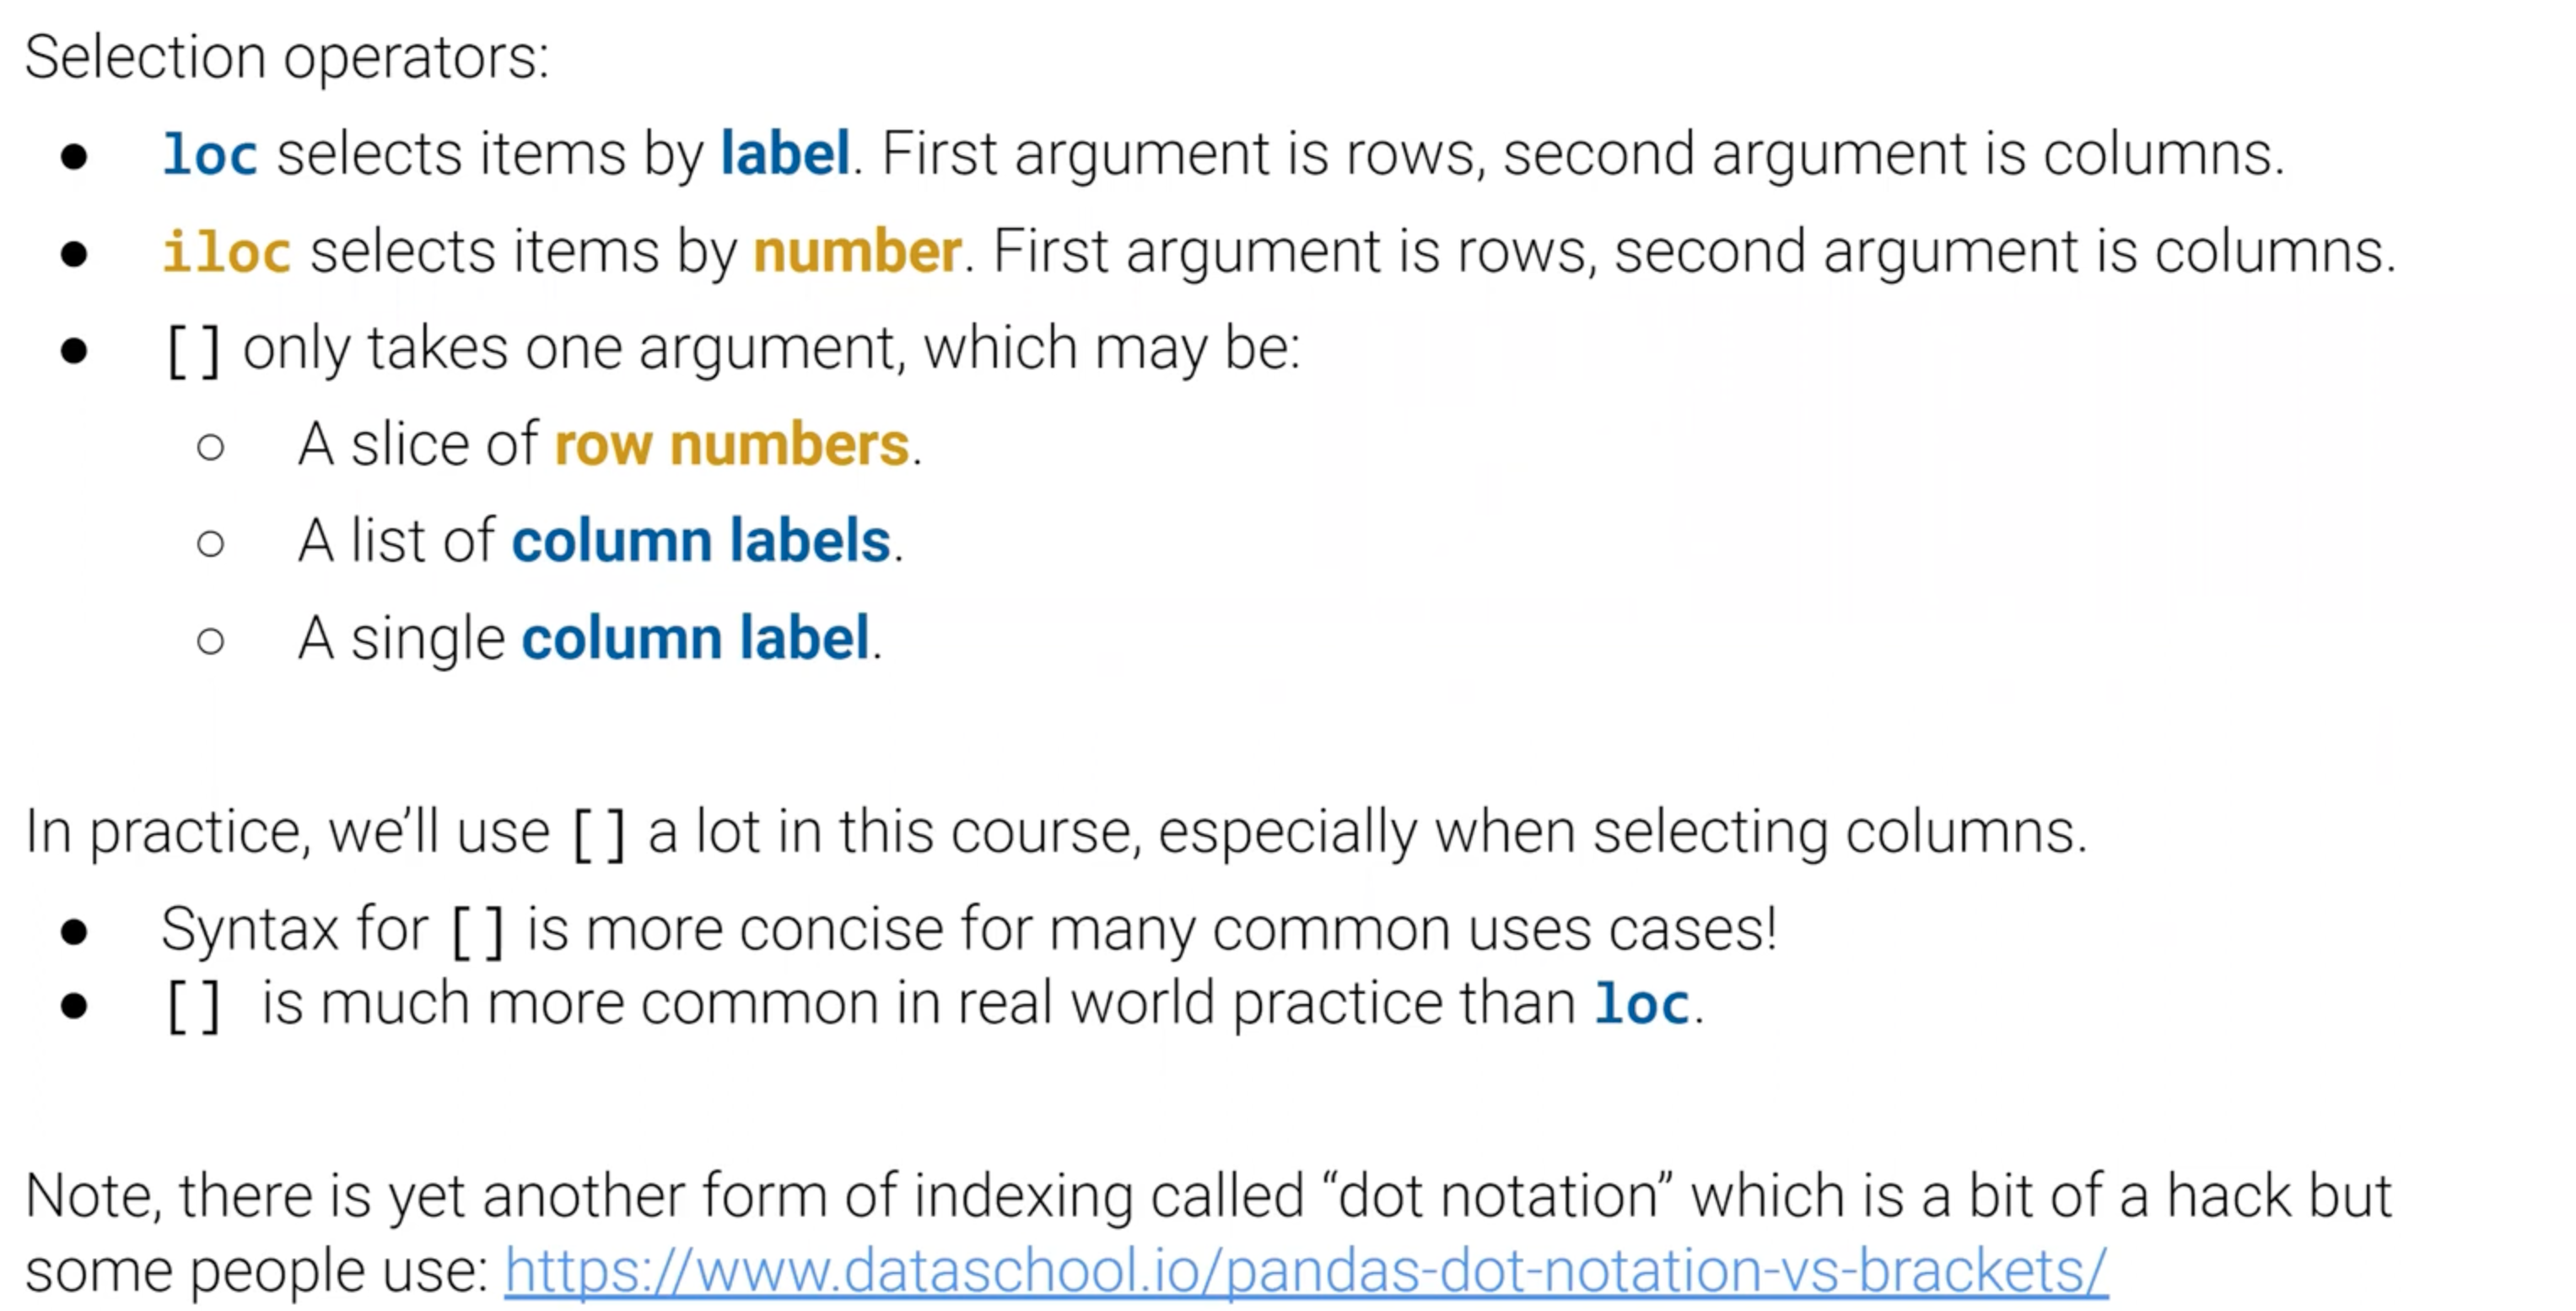

We could technically do anything we want using `loc` or `iloc`. However, in practice, the `[]` operator is often used instead to yield more concise code.

`[]` is a bit trickier to understand than `loc` or `iloc`, but it does essentially the same thing.

If we provide a slice of row numbers, we get the numbered rows.

In [ ]:
elections[3:7]

Year          Candidate                Party  Popular vote Result  \
3  1828  John Quincy Adams  National Republican        500897   loss   
4  1832     Andrew Jackson           Democratic        702735    win   
5  1832         Henry Clay  National Republican        484205   loss   
6  1832       William Wirt         Anti-Masonic        100715   loss   

           %  
3  43.796073  
4  54.574789  
5  37.603628  
6   7.821583

If we provide a list of column names, we get the listed columns.

In [ ]:
elections[["Year", "Candidate", "Result"]].tail(5)

Year       Candidate Result
177  2016      Jill Stein   loss
178  2020    Joseph Biden    win
179  2020    Donald Trump   loss
180  2020    Jo Jorgensen   loss
181  2020  Howard Hawkins   loss

And if we provide a single column name we get back just that column.

In [ ]:
elections["Candidate"].tail(5)

177        Jill Stein
178      Joseph Biden
179      Donald Trump
180      Jo Jorgensen
181    Howard Hawkins
Name: Candidate, dtype: object

In [ ]:
weird = pd.DataFrame({
    1:["topdog","botdog"], 
    "1":["topcat","botcat"]
})
weird

1       1
0  topdog  topcat
1  botdog  botcat

In [ ]:
#weird[1] #try to predict the output
# myans: botdog botcat (incorrect!)
weird[1]

0    topdog
1    botdog
Name: 1, dtype: object

In [ ]:
#weird["1"] #try to predict the output
# myans: 0 topcat \n 1 botcat
weird["1"]

0    topcat
1    botcat
Name: 1, dtype: object

In [ ]:
#weird[1:] #try to predict the output
# myans: botdog botcat
weird[1:]

1       1
1  botdog  botcat

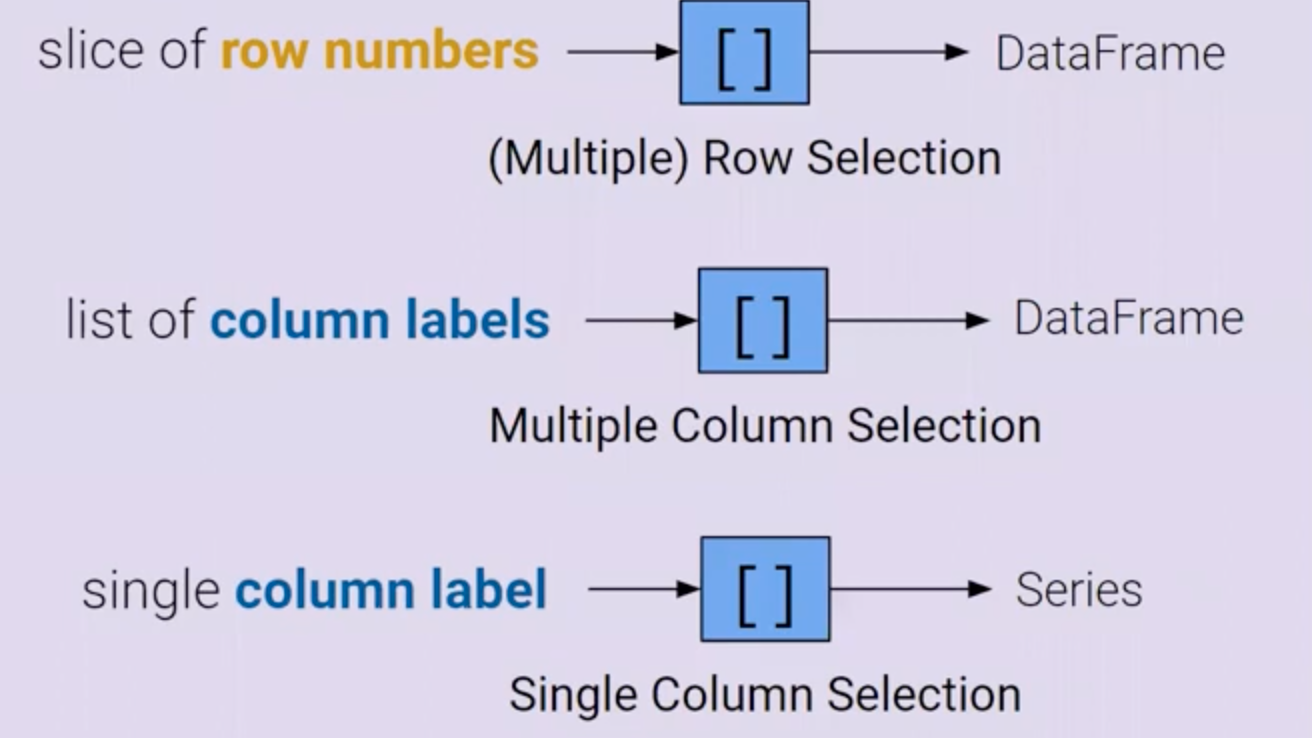

## Pandas Datastructures: DataFrames, Series, and Indices

In [ ]:
type(elections)

pandas.core.frame.DataFrame

In [ ]:
type(elections["Candidate"])

pandas.core.series.Series

An index can be non-nemuric, e.g. it can have a name:

In [ ]:
mottos = pd.read_csv("mottos.csv", index_col = "State")
mottos.loc["Alabama":"California"]

Motto                 Translation  \
State                                                                   
Alabama     Audemus jura nostra defendere  We dare defend our rights!   
Alaska                North to the future                           —   
Arizona                        Ditat Deus                God enriches   
Arkansas                   Regnat populus             The people rule   
California                Eureka (Εὕρηκα)             I have found it   

           Language Date Adopted  
State                             
Alabama       Latin         1923  
Alaska      English         1967  
Arizona       Latin         1863  
Arkansas      Latin         1907  
California    Greek         1849

And we can convert series to dataframes:

In [ ]:
elections["Candidate"].tail(5).to_frame()

Candidate
177      Jill Stein
178    Joseph Biden
179    Donald Trump
180    Jo Jorgensen
181  Howard Hawkins

In [ ]:
elections[["Candidate"]].tail(5)

Candidate
177      Jill Stein
178    Joseph Biden
179    Donald Trump
180    Jo Jorgensen
181  Howard Hawkins

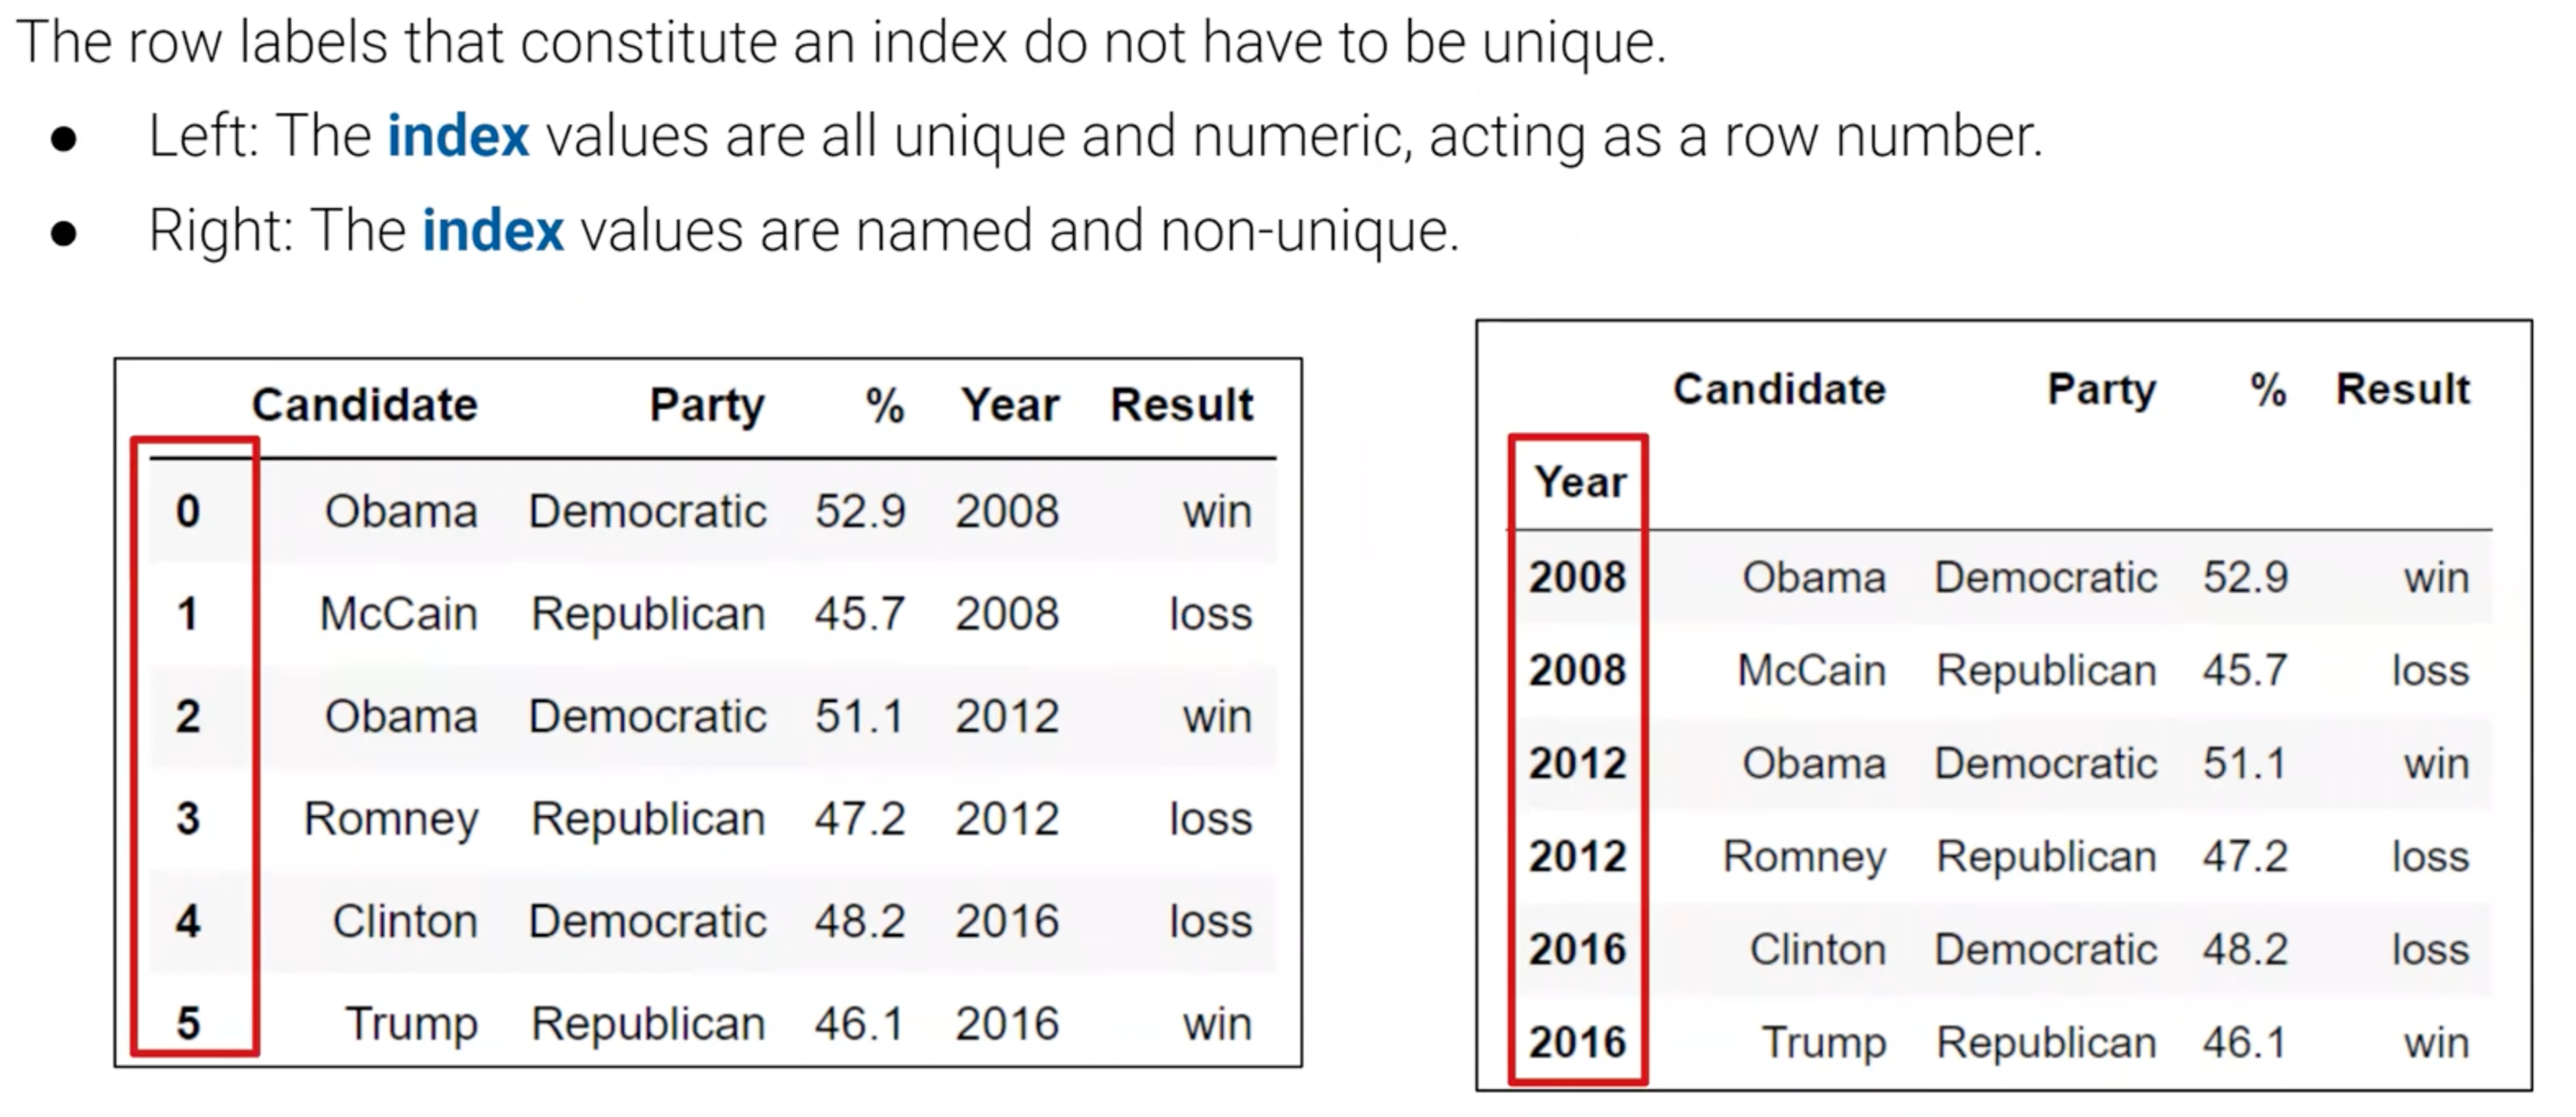

In [ ]:
elections_alt = pd.read_csv("elections.csv", index_col="Year")
elections_alt.loc[[1824]]

Candidate                  Party  Popular vote Result          %
Year                                                                          
1824     Andrew Jackson  Democratic-Republican        151271   loss  57.210122
1824  John Quincy Adams  Democratic-Republican        113142    win  42.789878

In [ ]:
mottos.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [ ]:
mottos.columns

Index(['Motto', 'Translation', 'Language', 'Date Adopted'], dtype='object')

## Conditional Selection

Basically, we can use boolean indexing:
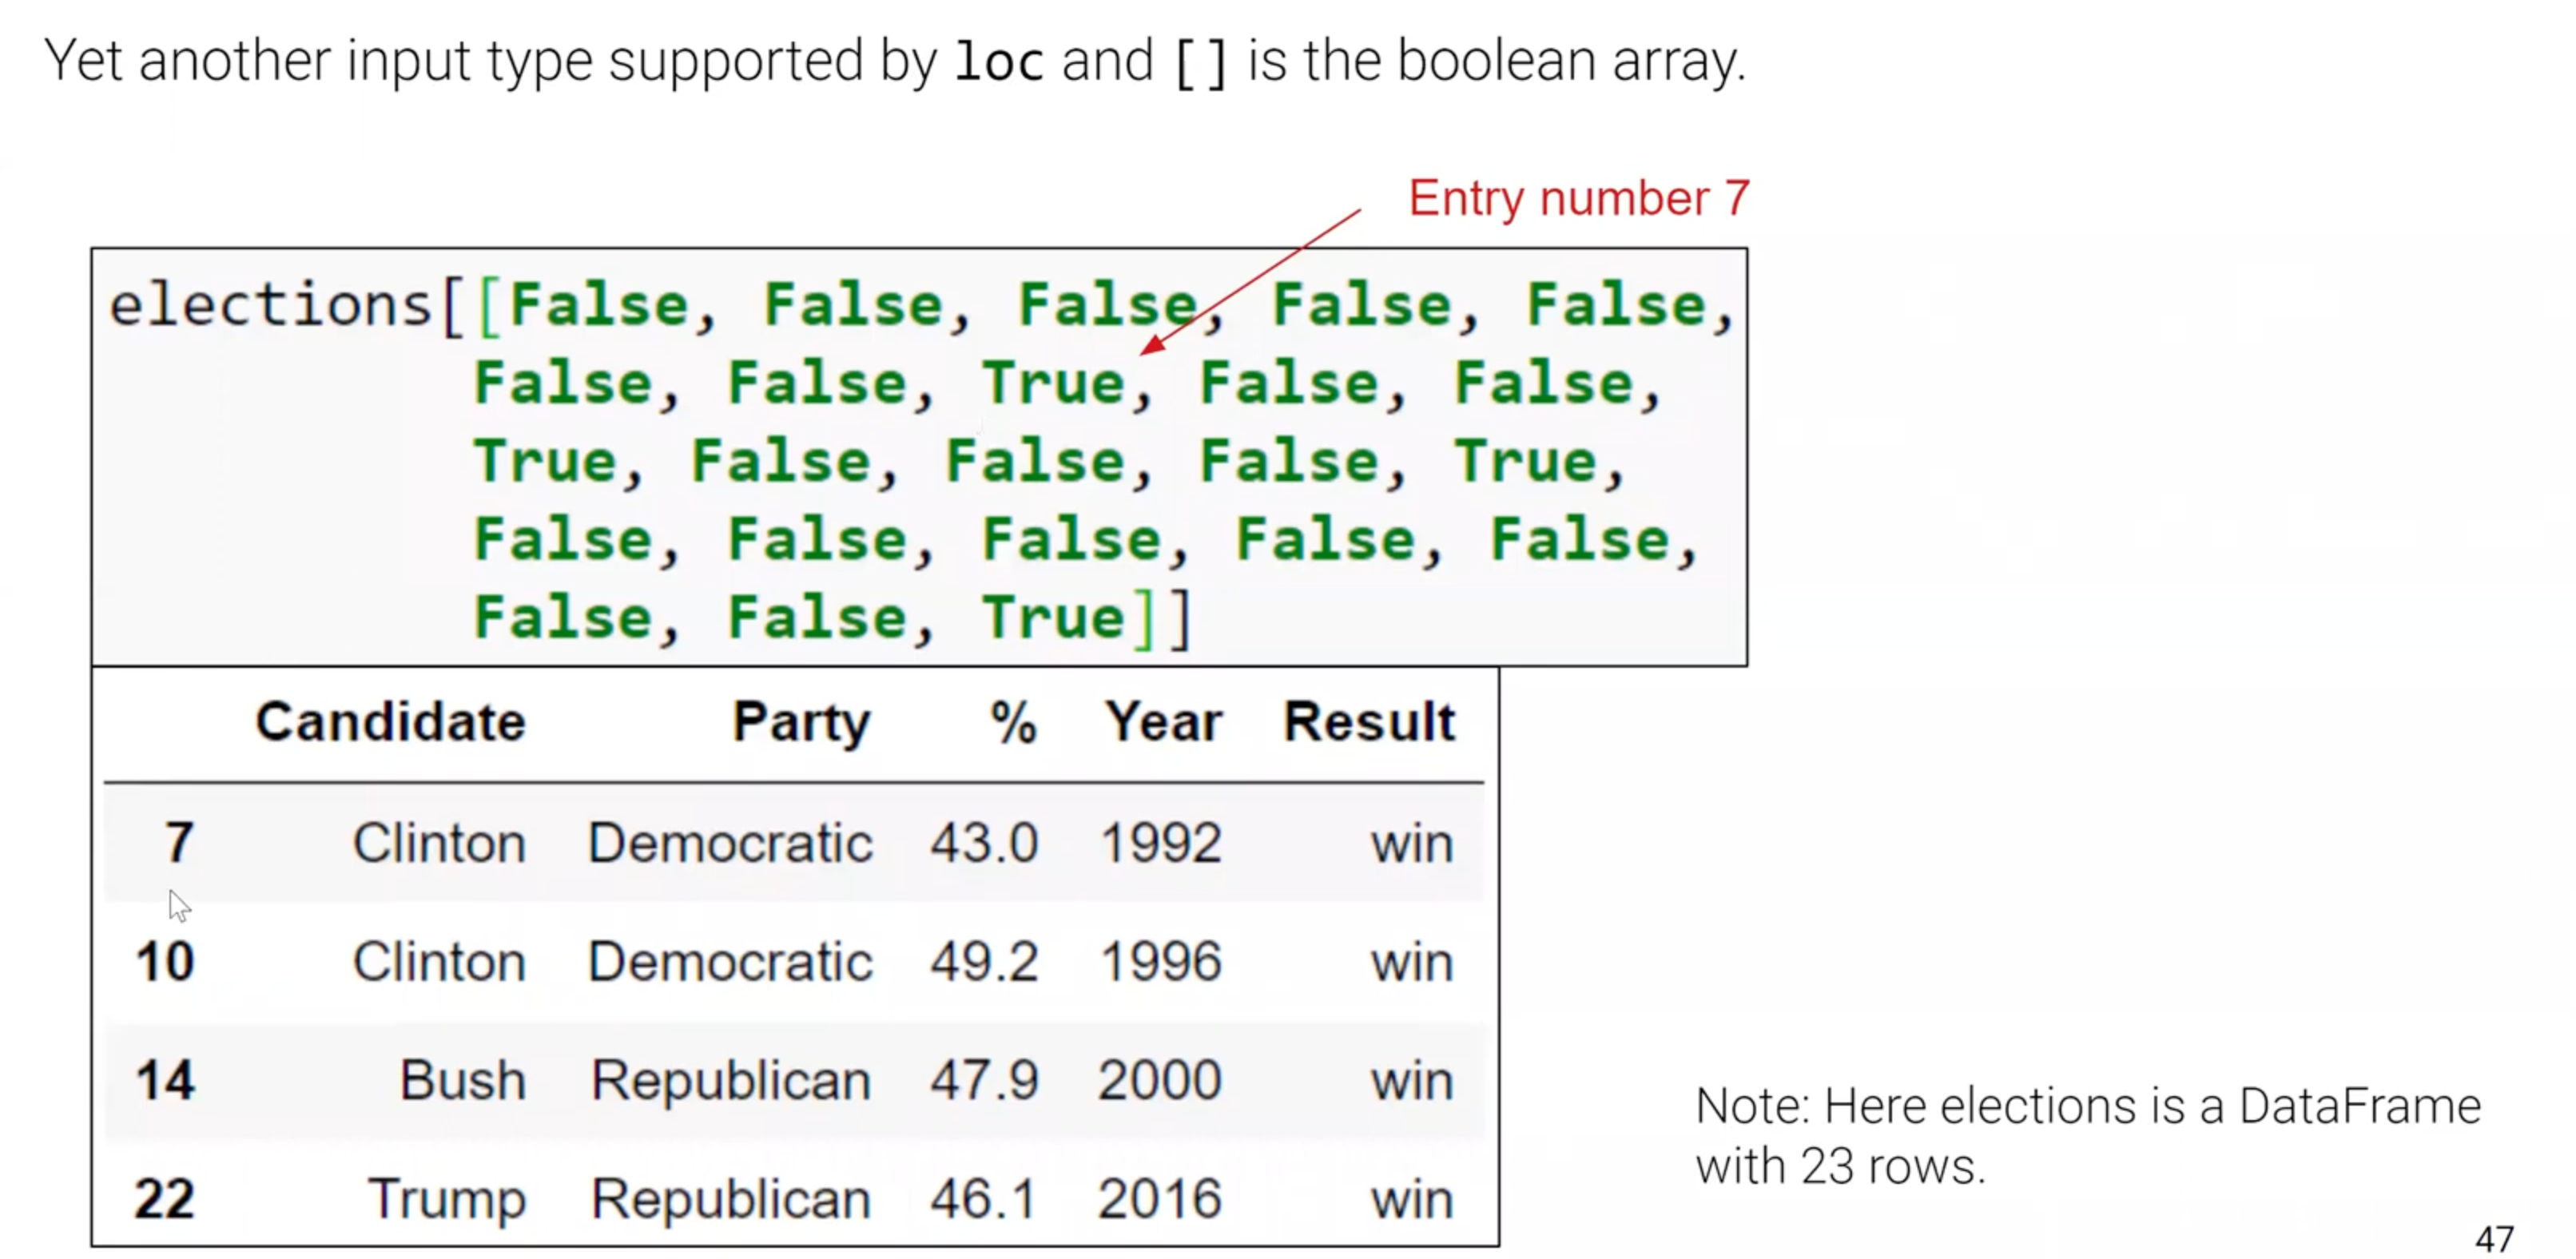

In [9]:
elections[elections["Party"] == "Independent"]

Year         Candidate        Party  Popular vote Result          %
121  1976   Eugene McCarthy  Independent        740460   loss   0.911649
130  1980  John B. Anderson  Independent       5719850   loss   6.631143
143  1992        Ross Perot  Independent      19743821   loss  18.956298
161  2004       Ralph Nader  Independent        465151   loss   0.380663
167  2008       Ralph Nader  Independent        739034   loss   0.563842
174  2016     Evan McMullin  Independent        732273   loss   0.539546

In [11]:
elections[(elections["Party"] == "Independent") & (elections["%"] < 47)]

Year         Candidate        Party  Popular vote Result          %
121  1976   Eugene McCarthy  Independent        740460   loss   0.911649
130  1980  John B. Anderson  Independent       5719850   loss   6.631143
143  1992        Ross Perot  Independent      19743821   loss  18.956298
161  2004       Ralph Nader  Independent        465151   loss   0.380663
167  2008       Ralph Nader  Independent        739034   loss   0.563842
174  2016     Evan McMullin  Independent        732273   loss   0.539546

In [10]:
elections["Party"] == "Independent"

0      False
1      False
2      False
3      False
4      False
       ...  
177    False
178    False
179    False
180    False
181    False
Name: Party, Length: 182, dtype: bool

Boolean array selection also works with `loc`!

In [12]:
elections.loc[elections["Party"] == "Independent"]

Year         Candidate        Party  Popular vote Result          %
121  1976   Eugene McCarthy  Independent        740460   loss   0.911649
130  1980  John B. Anderson  Independent       5719850   loss   6.631143
143  1992        Ross Perot  Independent      19743821   loss  18.956298
161  2004       Ralph Nader  Independent        465151   loss   0.380663
167  2008       Ralph Nader  Independent        739034   loss   0.563842
174  2016     Evan McMullin  Independent        732273   loss   0.539546

In [13]:
elections[(elections["Result"] == "win") & (elections["%"] < 47)]

Year          Candidate                  Party  Popular vote Result  \
1    1824  John Quincy Adams  Democratic-Republican        113142    win   
20   1856     James Buchanan             Democratic       1835140    win   
23   1860    Abraham Lincoln             Republican       1855993    win   
47   1892   Grover Cleveland             Democratic       5553898    win   
70   1912     Woodrow Wilson             Democratic       6296284    win   
117  1968      Richard Nixon             Republican      31783783    win   
140  1992       Bill Clinton             Democratic      44909806    win   
173  2016       Donald Trump             Republican      62984828    win   

             %  
1    42.789878  
20   45.306080  
23   39.699408  
47   46.121393  
70   41.933422  
117  43.565246  
140  43.118485  
173  46.407862

In [14]:
elections[[1]*len(elections)]

KeyError: "None of [Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n       ...\n       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],\n      dtype='int64', length=182)] are in the [columns]"

In [16]:
elections2 = pd.read_csv("annoying_puzzle2.csv")
elections2

Candidate        Party          %  Year Result
0    Reagan   Republican  50.897944  1980    win
1    Carter   Democratic  41.132848  1980   loss
2  Anderson  Independent   6.631143  1980   loss
3    Reagan   Republican  59.023326  1984    win
4   Mondale   Democratic  40.729429  1984   loss
5      Bush   Republican  53.518845  1988    win
6   Dukakis   Democratic  45.770691  1988   loss

In [23]:
#Which of the following yield the desired answer on the slides?
#elections2.iloc[[0, 3, 5], [0, 3]]
#elections2.loc[[0, 3, 5], "Candidate":"Year"]
elections2.loc[elections["%"] > 50, ["Candidate", "Year"]].head(3)
#elections2.loc[elections["%"] > 50, ["Candidate", "Year"]].iloc[0:2, :]

Candidate  Year
0    Reagan  1980
2  Anderson  1980
4   Mondale  1984

In [24]:
elections2 = elections[(elections["Year"] == 1980) | (elections["Year"] == 1984) | (elections["Year"] == 1988)]
elections2

Year          Candidate         Party  Popular vote Result          %
127  1980     Barry Commoner      Citizens        233052   loss   0.270182
128  1980           Ed Clark   Libertarian        921128   loss   1.067883
129  1980       Jimmy Carter    Democratic      35480115   loss  41.132848
130  1980   John B. Anderson   Independent       5719850   loss   6.631143
131  1980      Ronald Reagan    Republican      43903230    win  50.897944
132  1984     David Bergland   Libertarian        228111   loss   0.247245
133  1984      Ronald Reagan    Republican      54455472    win  59.023326
134  1984     Walter Mondale    Democratic      37577352   loss  40.729429
135  1988  George H. W. Bush    Republican      48886597    win  53.518845
136  1988      Lenora Fulani  New Alliance        217221   loss   0.237804
137  1988    Michael Dukakis    Democratic      41809074   loss  45.770691
138  1988           Ron Paul   Libertarian        431750   loss   0.472660

In [25]:
(
    elections[(elections["Party"] == "Anti-Masonic")  | 
              (elections["Party"] == "American")      |
              (elections["Party"] == "Anti-Monopoly") |
              (elections["Party"] == "American Independent")]
)
#Note: The parentheses surrounding the code make it possible to break the code on to multiple lines for readability

Year           Candidate                 Party  Popular vote Result  \
6    1832        William Wirt          Anti-Masonic        100715   loss   
22   1856    Millard Fillmore              American        873053   loss   
38   1884     Benjamin Butler         Anti-Monopoly        134294   loss   
115  1968      George Wallace  American Independent       9901118   loss   
119  1972     John G. Schmitz  American Independent       1100868   loss   
124  1976       Lester Maddox  American Independent        170274   loss   
126  1976  Thomas J. Anderson              American        158271   loss   

             %  
6     7.821583  
22   21.554001  
38    1.335838  
115  13.571218  
119   1.421524  
124   0.209640  
126   0.194862

In [26]:
a_parties = ["Anti-Masonic", "American", "Anti-Monopoly", "American Independent"]
elections[elections["Party"].isin(a_parties)]

Year           Candidate                 Party  Popular vote Result  \
6    1832        William Wirt          Anti-Masonic        100715   loss   
22   1856    Millard Fillmore              American        873053   loss   
38   1884     Benjamin Butler         Anti-Monopoly        134294   loss   
115  1968      George Wallace  American Independent       9901118   loss   
119  1972     John G. Schmitz  American Independent       1100868   loss   
124  1976       Lester Maddox  American Independent        170274   loss   
126  1976  Thomas J. Anderson              American        158271   loss   

             %  
6     7.821583  
22   21.554001  
38    1.335838  
115  13.571218  
119   1.421524  
124   0.209640  
126   0.194862

Pandas dumps all str methods into `.str` class:

In [27]:
elections[elections["Partmy"].str.startswith("A")]

Year           Candidate                 Party  Popular vote Result  \
6    1832        William Wirt          Anti-Masonic        100715   loss   
22   1856    Millard Fillmore              American        873053   loss   
38   1884     Benjamin Butler         Anti-Monopoly        134294   loss   
115  1968      George Wallace  American Independent       9901118   loss   
119  1972     John G. Schmitz  American Independent       1100868   loss   
124  1976       Lester Maddox  American Independent        170274   loss   
126  1976  Thomas J. Anderson              American        158271   loss   

             %  
6     7.821583  
22   21.554001  
38    1.335838  
115  13.571218  
119   1.421524  
124   0.209640  
126   0.194862

We can also use query using SQL like queries:

In [28]:
elections.query('Year >= 2000 and Result == "win"')

Year       Candidate       Party  Popular vote Result          %
152  2000  George W. Bush  Republican      50456002    win  47.974666
157  2004  George W. Bush  Republican      62040610    win  50.771824
162  2008    Barack Obama  Democratic      69498516    win  53.023510
168  2012    Barack Obama  Democratic      65915795    win  51.258484
173  2016    Donald Trump  Republican      62984828    win  46.407862
178  2020    Joseph Biden  Democratic      81268924    win  51.311515

In [29]:
parties = ["Republican", "Democratic"]
elections.query('Result == "win" and Party not in @parties')

Year               Candidate                  Party  Popular vote Result  \
1   1824       John Quincy Adams  Democratic-Republican        113142    win   
11  1840  William Henry Harrison                   Whig       1275583    win   
16  1848          Zachary Taylor                   Whig       1360235    win   
27  1864         Abraham Lincoln         National Union       2211317    win   

            %  
1   42.789878  
11  53.051213  
16  47.309296  
27  54.951512

## Built In Functions

In [30]:
winners = elections.query('Result == "win"')["%"]
winners.head(5)

1     42.789878
2     56.203927
4     54.574789
8     52.272472
11    53.051213
Name: %, dtype: float64

In [31]:
np.mean(winners)

51.711492943

In [32]:
max(winners)

61.34470329

In [33]:
elections

Year          Candidate                  Party  Popular vote Result  \
0    1824     Andrew Jackson  Democratic-Republican        151271   loss   
1    1824  John Quincy Adams  Democratic-Republican        113142    win   
2    1828     Andrew Jackson             Democratic        642806    win   
3    1828  John Quincy Adams    National Republican        500897   loss   
4    1832     Andrew Jackson             Democratic        702735    win   
..    ...                ...                    ...           ...    ...   
177  2016         Jill Stein                  Green       1457226   loss   
178  2020       Joseph Biden             Democratic      81268924    win   
179  2020       Donald Trump             Republican      74216154   loss   
180  2020       Jo Jorgensen            Libertarian       1865724   loss   
181  2020     Howard Hawkins                  Green        405035   loss   

             %  
0    57.210122  
1    42.789878  
2    56.203927  
3    43.796073  
4    54.574789  
..         ...  
177   1.073699  
178  51.311515  
179  46.858542  
180   1.177979  
181   0.255731  

[182 rows x 6 columns]

In [34]:
elections.size

1092

In [35]:
elections.shape

(182, 6)

In [36]:
elections.describe()

Year  Popular vote           %
count   182.000000  1.820000e+02  182.000000
mean   1934.087912  1.235364e+07   27.470350
std      57.048908  1.907715e+07   22.968034
min    1824.000000  1.007150e+05    0.098088
25%    1889.000000  3.876395e+05    1.219996
50%    1936.000000  1.709375e+06   37.677893
75%    1988.000000  1.897775e+07   48.354977
max    2020.000000  8.126892e+07   61.344703

In [38]:
elections.sample(5).iloc[:, 0:2]

Year           Candidate
110  1956  T. Coleman Andrews
62   1908      Eugene V. Debs
38   1884     Benjamin Butler
115  1968      George Wallace
173  2016        Donald Trump

elections.query('Year == 2000').sample(4, replace = True).iloc[:, 0:2]

In [39]:
elections["Candidate"].value_counts()

Candidate
Norman Thomas         5
Ralph Nader           4
Franklin Roosevelt    4
Eugene V. Debs        4
Andrew Jackson        3
                     ..
Silas C. Swallow      1
Alton B. Parker       1
John G. Woolley       1
Joshua Levering       1
Howard Hawkins        1
Name: count, Length: 132, dtype: int64

In [40]:
elections["Candidate"].value_counts()

Candidate
Norman Thomas         5
Ralph Nader           4
Franklin Roosevelt    4
Eugene V. Debs        4
Andrew Jackson        3
                     ..
Silas C. Swallow      1
Alton B. Parker       1
John G. Woolley       1
Joshua Levering       1
Howard Hawkins        1
Name: count, Length: 132, dtype: int64

In [41]:
elections["Party"].unique()

array(['Democratic-Republican', 'Democratic', 'National Republican',
       'Anti-Masonic', 'Whig', 'Free Soil', 'Republican', 'American',
       'Constitutional Union', 'Southern Democratic',
       'Northern Democratic', 'National Union', 'Liberal Republican',
       'Greenback', 'Anti-Monopoly', 'Prohibition', 'Union Labor',
       'Populist', 'National Democratic', 'Socialist', 'Progressive',
       'Farmer–Labor', 'Communist', 'Union', 'Dixiecrat',
       "States' Rights", 'American Independent', 'Independent',
       'Libertarian', 'Citizens', 'New Alliance', 'Taxpayers',
       'Natural Law', 'Green', 'Reform', 'Constitution'], dtype=object)

In [42]:
elections["Candidate"].sort_values()

75           Aaron S. Watkins
27            Abraham Lincoln
23            Abraham Lincoln
108           Adlai Stevenson
105           Adlai Stevenson
                ...          
19             Winfield Scott
37     Winfield Scott Hancock
74             Woodrow Wilson
70             Woodrow Wilson
16             Zachary Taylor
Name: Candidate, Length: 182, dtype: object

In [43]:
elections.sort_values("%", ascending = False)

Year           Candidate         Party  Popular vote Result          %
114  1964      Lyndon Johnson    Democratic      43127041    win  61.344703
91   1936  Franklin Roosevelt    Democratic      27752648    win  60.978107
120  1972       Richard Nixon    Republican      47168710    win  60.907806
79   1920      Warren Harding    Republican      16144093    win  60.574501
133  1984       Ronald Reagan    Republican      54455472    win  59.023326
..    ...                 ...           ...           ...    ...        ...
165  2008    Cynthia McKinney         Green        161797   loss   0.123442
148  1996        John Hagelin   Natural Law        113670   loss   0.118219
160  2004    Michael Peroutka  Constitution        143630   loss   0.117542
141  1992            Bo Gritz      Populist        106152   loss   0.101918
156  2004          David Cobb         Green        119859   loss   0.098088

[182 rows x 6 columns]